In [95]:
#modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
#models
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
#tuning hyperparameters
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
#evaluation
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score,roc_curve,plot_roc_curve
from sklearn.model_selection import cross_val_score
#oversampling
from imblearn.over_sampling import SMOTE
import pickle


In [1]:
import site
site.addsitedir("D:\\_learn\\banking_dataset\\env")
site.addsitedir("D:\\_learn\\banking_dataset\\env\\lib\\site-packages")
from imblearn.over_sampling import SMOTE


## Dataset Analysis

In [3]:
df=pd.read_csv("train.csv",delimiter=";")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


* There are 45211 data entries, good amount for machine learning algorythms

In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


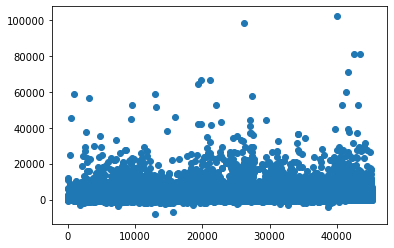

In [5]:
plt.scatter(df.index,df["balance"])

* There are some outliners with balance > 70000

In [6]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

* No missing values

In [7]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [8]:
df["y"].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

* Classes are unbalanced — could be a problem for machine learning algorithms to correctly classify minority class. Can be solved by oversampling with SMOTE.

In [9]:
#fixing possible whitespace errors
df.columns=df.columns.str.replace(' ','')

In [10]:
df["job"].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [11]:
df["marital"].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [12]:
df["education"].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [13]:
df["contact"].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [14]:
df["poutcome"].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

* There are no NaN values, however there are "unknown" values. They need to be imputed before modeling.

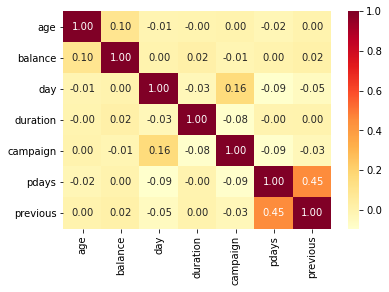

In [15]:
sns.heatmap(df.corr(), annot=True, fmt=".2f",cmap="YlOrRd");

* duration has huge influence on target "y" column

## Categorical feature analysis

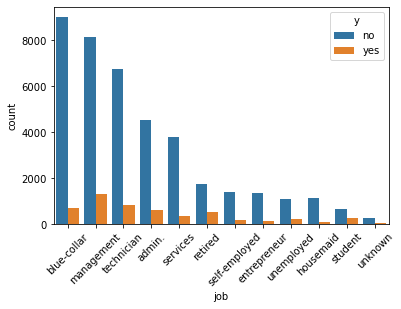

In [16]:
job = sns.countplot(x="job", data = df, hue = "y", order = df["job"].value_counts().index)
job.tick_params(axis='x', rotation=45)

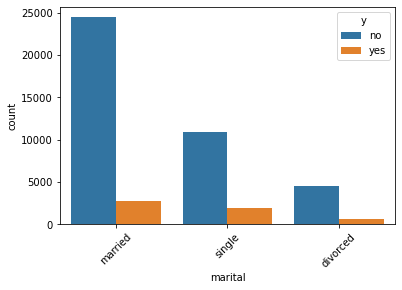

In [17]:
marital = sns.countplot(x="marital", data = df, hue = "y", order = df["marital"].value_counts().index)
marital.tick_params(axis='x', rotation=45)

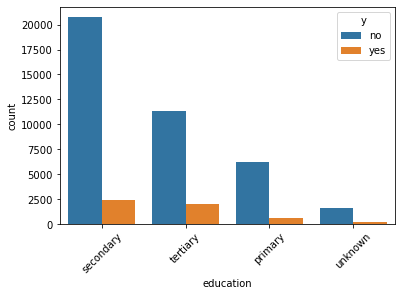

In [18]:
education = sns.countplot(x="education", data = df, hue = "y", order = df["education"].value_counts().index)
education.tick_params(axis='x', rotation=45)

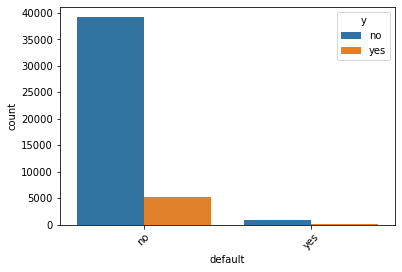

In [19]:
default = sns.countplot(x="default", data = df, hue = "y", order = df["default"].value_counts().index)
default.tick_params(axis='x', rotation=45)

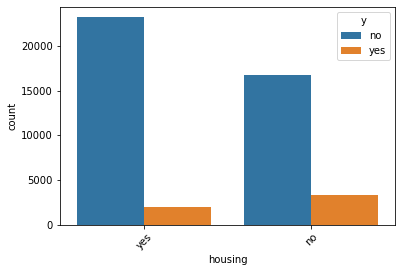

In [20]:
housing = sns.countplot(x="housing", data = df, hue = "y", order = df["housing"].value_counts().index)
housing.tick_params(axis='x', rotation=45)

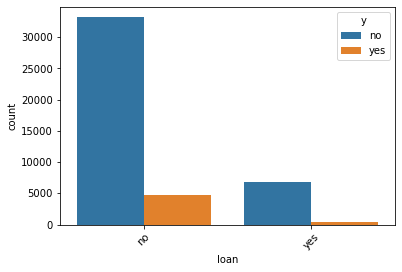

In [21]:
loan = sns.countplot(x="loan", data = df, hue = "y", order = df["loan"].value_counts().index)
loan.tick_params(axis='x', rotation=45)

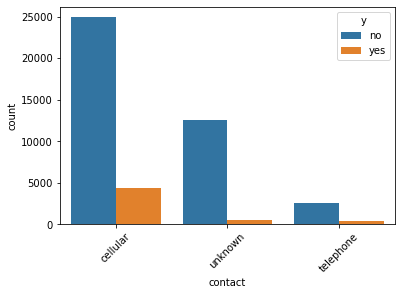

In [22]:
contact = sns.countplot(x="contact", data = df, hue = "y", order = df["contact"].value_counts().index)
contact.tick_params(axis='x', rotation=45)

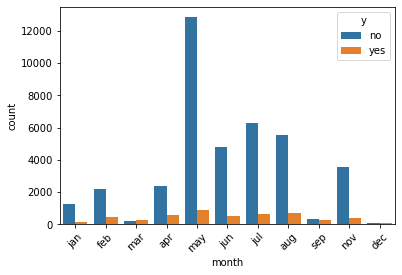

In [23]:
month = sns.countplot(x="month", data = df, hue = "y", order = ["jan","feb","mar","apr","may","jun","jul","aug","sep","nov","dec"])
month.tick_params(axis='x', rotation=45)

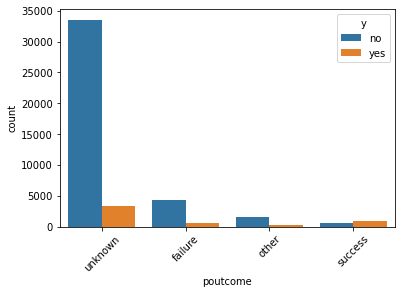

In [24]:
poutcome = sns.countplot(x="poutcome", data = df, hue = "y", order = df["poutcome"].value_counts().index)
poutcome.tick_params(axis='x', rotation=45)

* High educated and high qualified persons tends to subscribe on a term deposit
* Married and single subscribe much more often than divorsed
* Positive value in default column means no success chance
* No housing or no loan means higher success chance
* Persons contacted by cellular are much more often agree to subscribe, huge amount of unknown values need to be threated
* Month column seems to have almost no effect on target column, can be dropped
* Poutcome: unknown is a valid value, no need to impute

## Numeric feature analysis

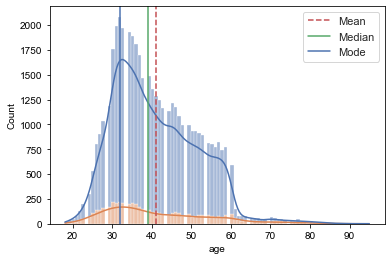

In [25]:
fig,  ax = plt.subplots()
sns.set(style='whitegrid')
mean=df['age'].mean()
median=df['age'].median()
mode=df['age'].mode().values[0]
sns.histplot(data=df, x="age", ax=ax, kde=True,hue="y",multiple="stack")
ax.axvline(mean, color='r', linestyle='--', label="Mean")
ax.axvline(median, color='g', linestyle='-', label="Median")
ax.axvline(mode, color='b', linestyle='-', label="Mode")
ax.legend()
plt.show()

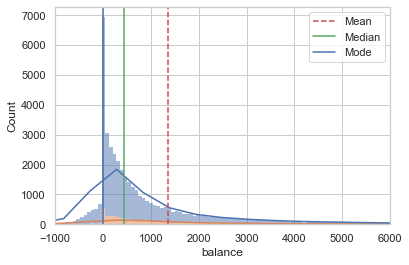

In [26]:
fig,  ax = plt.subplots()
sns.set(style='whitegrid')
mean=df['balance'].mean()
median=df['balance'].median()
mode=df['balance'].mode().values[0]
sns.histplot(data=df, x="balance", ax=ax,hue="y",multiple="stack", kde=True)
ax.axvline(mean, color='r', linestyle='--', label="Mean")
ax.axvline(median, color='g', linestyle='-', label="Median")
ax.axvline(mode, color='b', linestyle='-', label="Mode")
ax.legend()
ax.set_xlim(left=-1000,right=6000)
plt.show()

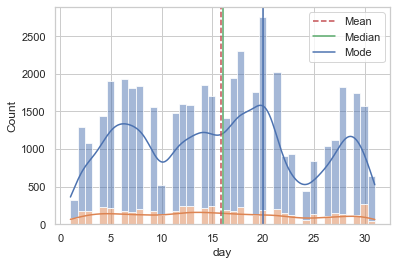

In [27]:
fig,  ax = plt.subplots()
sns.set(style='whitegrid')
mean=df['day'].mean()
median=df['day'].median()
mode=df['day'].mode().values[0]
sns.histplot(data=df, x="day", ax=ax, hue="y",multiple="stack",kde=True)
ax.axvline(mean, color='r', linestyle='--', label="Mean")
ax.axvline(median, color='g', linestyle='-', label="Median")
ax.axvline(mode, color='b', linestyle='-', label="Mode")
ax.legend()
plt.show()

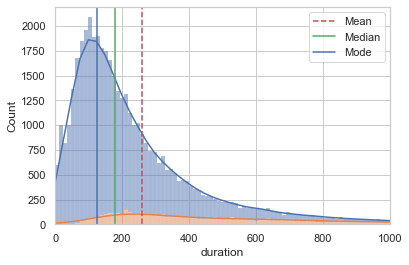

In [28]:
fig,  ax = plt.subplots()
sns.set(style='whitegrid')
mean=df['duration'].mean()
median=df['duration'].median()
mode=df['duration'].mode().values[0]
sns.histplot(data=df, x="duration" ,hue="y",multiple="stack",ax=ax, kde=True)
ax.axvline(mean, color='r', linestyle='--', label="Mean")
ax.axvline(median, color='g', linestyle='-', label="Median")
ax.axvline(mode, color='b', linestyle='-', label="Mode")
ax.legend()
ax.set_xlim(left=0,right=1000)
plt.show()

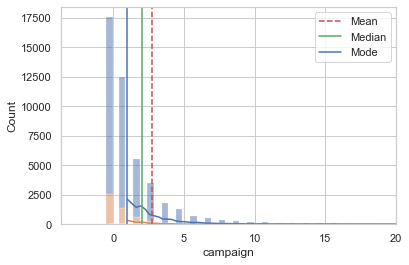

In [29]:
fig,  ax = plt.subplots()
sns.set(style='whitegrid')
mean=df['campaign'].mean()
median=df['campaign'].median()
mode=df['campaign'].mode().values[0]
sns.histplot(data=df, x="campaign",hue="y",multiple="stack", ax=ax, kde=True,shrink=4)
ax.axvline(mean, color='r', linestyle='--', label="Mean")
ax.axvline(median, color='g', linestyle='-', label="Median")
ax.axvline(mode, color='b', linestyle='-', label="Mode")
ax.legend()
ax.set_xlim(right=20)
plt.show()

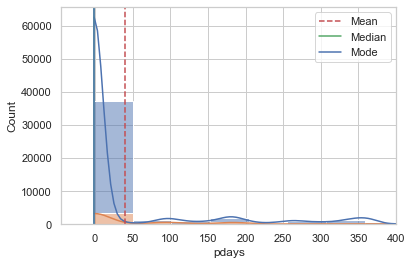

In [30]:
fig,  ax = plt.subplots()
sns.set(style='whitegrid')
mean=df['pdays'].mean()
median=df['pdays'].median()
mode=df['pdays'].mode().values[0]
sns.histplot(data=df, x="pdays",hue="y",multiple="stack", ax=ax, kde=True)
ax.axvline(mean, color='r', linestyle='--', label="Mean")
ax.axvline(median, color='g', linestyle='-', label="Median")
ax.axvline(mode, color='b', linestyle='-', label="Mode")
ax.legend()
ax.set_xlim(right=400)
plt.show()


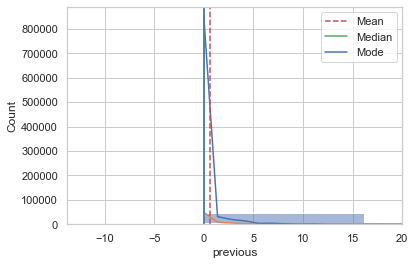

In [31]:
fig,  ax = plt.subplots()
sns.set(style='whitegrid')
mean=df['previous'].mean()
median=df['previous'].median()
mode=df['previous'].mode().values[0]
sns.histplot(data=df, x="previous",hue="y",multiple="stack", ax=ax, kde=True)
ax.axvline(mean, color='r', linestyle='--', label="Mean")
ax.axvline(median, color='g', linestyle='-', label="Median")
ax.axvline(mode, color='b', linestyle='-', label="Mode")
ax.legend()
ax.set_xlim(right=20)
plt.show()


* Age: most success rate is between 25 and 50.
* Balance:  0-1000 provides the best results
* Day: there are no correlation, can be removed from the dataset
* Duration: 100-300 provides best success rate
* Campaign 0-3 attempts provides most result, more is unnecesary
* Pdays: 0-50 provides most positive results
* Previous can be removed from dataset

In [32]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## Clean and preprocess data

In [33]:
df_clean=df.copy()
# droping outliners
df_clean=df_clean.drop(df[df["balance"]>70000].index)
# Converting binary features "yes/no" to 1/0
df_clean=df_clean.replace(["yes","no"],[1,0])
#droping columns that we don't need for modeling
df_clean=df_clean.drop(["day","month","pdays","previous"],axis=1)
#dealing with "unknown"
df_clean["job"].replace(["unknown"],df_clean["job"].mode(), inplace=True)
df_clean["education"].replace(["unknown"],df_clean["education"].mode(), inplace=True)
df_clean["contact"].replace(["unknown"],df_clean["contact"].mode(), inplace=True)
df_clean["contact"]=df_clean["contact"].map({"telephone":1, "cellular":0})

df_clean         

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,0,261,1,unknown,0
1,44,technician,single,secondary,0,29,1,0,0,151,1,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,0,76,1,unknown,0
3,47,blue-collar,married,secondary,0,1506,1,0,0,92,1,unknown,0
4,33,blue-collar,single,secondary,0,1,0,0,0,198,1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,0,977,3,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,0,456,2,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,0,1127,5,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,1,508,4,unknown,0


In [34]:
df_clean_enc=pd.get_dummies(df_clean, columns=["job","marital","education","poutcome"])
df_clean_enc

,age,default,balance,housing,loan,contact,duration,campaign,y,job_admin.,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,0,261,1,0,0,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,0,151,1,0,0,...,0,0,1,0,1,0,0,0,0,1
2,33,0,2,1,1,0,76,1,0,0,...,0,1,0,0,1,0,0,0,0,1
3,47,0,1506,1,0,0,92,1,0,0,...,0,1,0,0,1,0,0,0,0,1
4,33,0,1,0,0,0,198,1,0,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,0,977,3,1,0,...,0,1,0,0,0,1,0,0,0,1
45207,71,0,1729,0,0,0,456,2,1,0,...,1,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,0,1127,5,1,0,...,0,1,0,0,1,0,0,0,1,0
45209,57,0,668,0,0,1,508,4,0,0,...,0,1,0,0,1,0,0,0,0,1


## Modeling

In [42]:
dfe=df_clean_enc.copy()
y=dfe["y"]
X=dfe.drop("y",axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
def fit_and_score(models, X_train,X_test,y_train,y_test):
    for model in models:
        model.fit(X_train,y_train)
        y_preds=model.predict(X_test)
        print(model)
        print(classification_report(y_test,y_preds))
        print(' ')
rfc=RandomForestClassifier()
knn=KNeighborsClassifier()
svc=SVC()
lsvc=LinearSVC()
models=[rfc,knn,svc,lsvc]

RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      8003
           1       0.60      0.35      0.44      1039

    accuracy                           0.90      9042
   macro avg       0.76      0.66      0.69      9042
weighted avg       0.88      0.90      0.89      9042

 
KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      8003
           1       0.47      0.22      0.29      1039

    accuracy                           0.88      9042
   macro avg       0.69      0.59      0.62      9042
weighted avg       0.85      0.88      0.86      9042

 
SVC()
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      8003
           1       0.25      0.00      0.01      1039

    accuracy                           0.88      9042
   macro avg       0.57      0.50      0.47      9042
weighted avg    

D:\_learn\new_project\env\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()
              precision    recall  f1-score   support

           0       0.98      0.54      0.70      8003
           1       0.20      0.91      0.33      1039

    accuracy                           0.58      9042
   macro avg       0.59      0.72      0.52      9042
weighted avg       0.89      0.58      0.66      9042

 


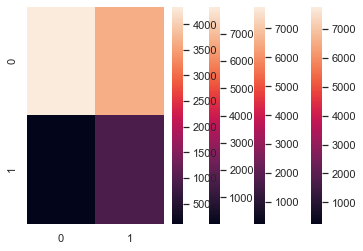

In [40]:
fit_and_score(models,X_train,X_test,y_train,y_test)

* All models are having problem to classify minority class with target=1.
* While precision is somewhat bearable, recall values are terrible.
* That can be solved with oversampling.

In [83]:
dfe_oversampled=dfe.copy()
y=dfe_oversampled["y"]
X=dfe_oversampled.drop("y",axis=1)
oversmple=SMOTE()
X,y=oversmple.fit_resample(X,y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [56]:
# Fit and evaluate oversampled data
fit_and_score(models,X_train,X_test,y_train,y_test)

RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7971
           1       0.95      0.92      0.94      7997

    accuracy                           0.94     15968
   macro avg       0.94      0.94      0.94     15968
weighted avg       0.94      0.94      0.94     15968

 
KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.92      0.76      0.83      7971
           1       0.79      0.93      0.86      7997

    accuracy                           0.85     15968
   macro avg       0.86      0.85      0.84     15968
weighted avg       0.86      0.85      0.84     15968

 
SVC()
              precision    recall  f1-score   support

           0       0.70      0.79      0.74      7971
           1       0.76      0.67      0.71      7997

    accuracy                           0.73     15968
   macro avg       0.73      0.73      0.73     15968
weighted avg    

D:\_learn\new_project\env\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


* RandomForestClassifier provides best precision and recall both on majority and minority classes, lets tune hyperparameters and cross-validate it.

In [84]:
n_estimators = [100, 500,1200]
max_depth = [None, 5,  15, 25]
min_samples_split = [2, 20, 100]
min_samples_leaf = [1, 2, 5, 10] 

grid_dict = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

grid = RandomizedSearchCV(rfc, grid_dict, cv = 3, verbose = 1, n_iter=20, scoring="recall",
                      n_jobs = -1)
best_estimator = grid.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [85]:
best_estimator.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': None}

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      7943
           1       0.95      0.92      0.94      8025

    accuracy                           0.94     15968
   macro avg       0.94      0.94      0.94     15968
weighted avg       0.94      0.94      0.94     15968



<AxesSubplot:>

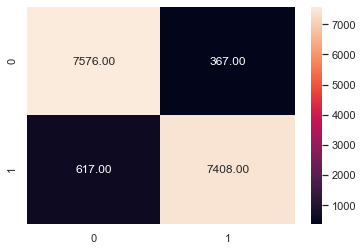

In [86]:
# testing on oversampled data
y_preds=best_estimator.predict(X_test)
print(classification_report(y_test,y_preds))
sns.heatmap(confusion_matrix(y_test,y_preds), annot=True,fmt=".2f")

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      7986
           1       0.86      0.69      0.77      1056

    accuracy                           0.95      9042
   macro avg       0.91      0.84      0.87      9042
weighted avg       0.95      0.95      0.95      9042



<AxesSubplot:>

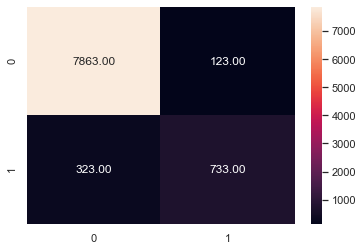

In [87]:
# testing on non-oversampled data
y=dfe["y"]
X=dfe.drop("y",axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
y_preds=best_estimator.predict(X_test)
print(classification_report(y_test,y_preds))
sns.heatmap(confusion_matrix(y_test,y_preds), annot=True,fmt=".2f")

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      7954
           1       0.94      0.88      0.91      1088

    accuracy                           0.98      9042
   macro avg       0.96      0.94      0.95      9042
weighted avg       0.98      0.98      0.98      9042



<AxesSubplot:>

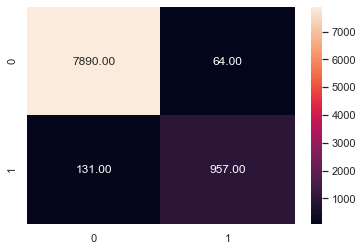

In [91]:
# testing default-parameters Random Forest Classifier on non-oversampled data
y=dfe["y"]
X=dfe.drop("y",axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
y_preds=rfc.predict(X_test)
print(classification_report(y_test,y_preds))
sns.heatmap(confusion_matrix(y_test,y_preds), annot=True,fmt=".2f")

In [90]:
#cross-validation scores:
print(cross_val_score(rfc,X,y))

[0.88885202 0.88707001 0.88485787 0.88010176 0.8302179 ]


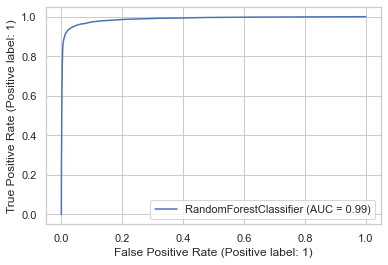

In [96]:
plot_roc_curve(rfc,X,y,)

In [97]:
roc_auc_score(y_test,y_preds)

0.9357746611028118

## Best results are achived by RandomForestClassifier with default params
* accuracy 0.98
* auc_score 0.93


In [98]:
# Saving fitted model for future use
filename = 'rfc_banking_fitted.sav'
pickle.dump(rfc, open(filename, 'wb'))